# Zelan Extended Essay


** To Dos**
~~1. Understand EEGDenoiseNet dataset structure (rows, columns)~~
~~2. Understand EEGDenoiseNet dataset's Github repository and sample codes, what a certain code file and line is for, and how I can use this as a baseline for my code.~~
3. Comprehend EOG orientation + create code to synthesize own 'dirty data'
4. Create an experimental setup.
&nbsp; 4.1. Read literature that used simulated EEG datasets (better if paper used EEGDenoiseNet specifically as well) and take note of how they used the dataset. This includes but is not limited to the ratio of the dataset used for training & testing, number of repetitions they used, performance metrics, and the model they used.
&nbsp; 4.2. Tabulate information about the paper (ex. Title, Link, Author, objective, dataset, method).
&nbsp; 4.3. Evaluate which method may work better for my objective.

## Questions (tbd/tba)
---
#### Preprocessing
1. Baseline frequency, notching, and Resampling were done to standardize the datasets among the EEG ground truth, EMG, and EOG artifacts. Why was the dataset resampled specifically to a 256Hz sampling rate? What makes this rate optimal for the dataset?
2. The dataset used ICA to achieve the EEG ground truth data. Will this affect my experimentation?
3. Since the dataset is based on real data but just artifically synthesized, can the dataset still be considered a simulated EEG Data?
&nbsp;--->YES. The dataset has a set ground truth, the new dataset to be used for experimentation is generated using controlled parameters and a given mathematical model (shown in section '2.2 Data Usage' of the paper), and the dataset is controlled and repeatable.
---
#### EOG data (Orientation: VEOG and HEOG)
**Why is there a vertical and horizontal EOG on the photo 'Example of Segments?' What do these imply?**

* Vertical EOG (VEOG) measures vertical eye movements.
* Horizontal EOG (HEOG) measures horizontal eye movements. The orientation of the electrodes and the placement of reference electrodes matter to accurately capture the eye movement signals.
* The EOG signal will show a positive or negative voltage deflection based on the direction of the eye movement and the electrode configuration. Thus, the orientation matters.

**How do I work with these orientations in the data?**

---
#### 1.4.2. SNR & RMS (Mathematics + Theory)
**How important is an adjustable SNR in this case? What specific role does SNR play in the dataset and the performance of the denoising algorithm to be used?**
&nbsp; --> Adjusting the SNR allows researchers to control the difficulty of the denoising task. Higher SNR levels (more signal, less noise) represent cleaner and easier-to-denoise signals, while lower SNR levels (weaker signal, more noise) introduce more challenging denoising scenarios. By training the algorithm on a dataset with adjustable SNR, the model can learn to handle both simple and complex denoising tasks, enhancing its generalization and adaptability to real-world EEG data.


**For my experimentation, how should I deal with the SNR? Should I pick a certain SNR (and how do I pick) or should I use varying SNRs, replicate, and tabulate the results?**
&nbsp; --> Look into related literatures' methods and see which one would work best for your case.




## I. Research Paper Review + Notes
**Title**:[EEGdenoiseNet: a benchmark dataset for deep learning solutions of EEG denoising](https://doi.org/10.1088/1741-2552/ac2bf8)
**Authors**:Haoming Zhang et al
**Link**: [https://github.com/ncclabsustech/EEGdenoiseNet](https://github.com/ncclabsustech/EEGdenoiseNet)
**File name**: EEG_all_epochs.npy
* Data stored in .npy files (Python numpy arrays)

### 1.1 Inclusions
* 4514 clean EEG segments
* 3400 ocular artifact segments (EOG)
* 5598 muscular artifact segments (EMG)

*Basically, the 4514 clean EEG segments will serve as my ground truth datasets. EOG and EMG are used to measure electrical brain activity or connection between the optics and heart activity respectively. EOG and EMG data were used by the researchers to create noise segments to be mixed with the 4514 clean EEG segments, acting as semi-synthetic data. Future researchers can then generate their own EOG-contaminated EEG, EMG-contaminated EEG, and EEG ground truth data*


### 1.2 Dataset Structure
* segmented into 2s epochs (each EEG recording is 2seconds)
* Number of rows represents number of samples
* all are resampled into 256Hz sampling rate. 512 columns because of the 2s duration per datapoint/row.
* The EEG data serves as the clean or ground truth data. The EEG, EMG, and EOG data are all separated to allow other researchers to synthesize their own mix of 'noise' (the emg or eog dataset) into their research. How to synthesize this dataset is documented in the research paper.

### 1.3 Dataset Collection Process
* 52 participants who performed both real and imaginary left and right hand movement task, with 64 channel EEG recorded simultaneously at 512 Hz sampling frequency.
![](64-channel-eeg.ppm)
* Downloaded EEG, EOG and EMG data from several publicly available data repositories which were published in previous studies (these studies cited in the paper)
* CLEAN EEG: Preprocessed and then separated into 2 second segments/epochs. 2 seconds. The researchers set the length of segments to 2s according to the previous knowledge of EEG signals. To add, it is difficult to obtain artifact-free EEG segments longer than 2 s due to the random eye blinks or movements.
* "To ensure the universality of this data set, we did not construct clean EEG signals with a specific number of channels due to the diversity of EEG caps, but constructed a dataset with single-channel EEG signal."

### 1.4 Preprocessing

1. *FREQUENCY RANGE OF INTEREST*: 1-80Hz; *data was filtered to include only these frequencies using band-pass filtering*
2. Notching at powerline frequency: a narrow band around the powerline frequency was filtered out to reduce any potential interference/noise caused by the powerline.
*A powerline is the frequency of the electrical power grid that supplies electricity. This powerline can generate electromagnetic fields that may interfere with the EEG signals.*
3. Re-sampling: From 512Hz, the dataset is re-sampled to a frequency of 256 Hz. It can be useful for standardizing the data or aligning it with other datasets.
4. EEG (Ground truth): Processed by ICLabel, a toolbox to remove EEG artifacts with independent component analysis (ICA)
5.
![](EEGDenoiseNet/1.2_eegdenoisenet_method.png)




### 1.5 Simulated Dataset Generation

#### 1.5.1 Linear Mixing
**Achieved by linearly mixing the pure EEG segments with EOG or EMG artifact segments, according to equation:**

$$y = x + λ · n$$
* $y$ is the simulated data (EEG mixed with artifact)
* $x$ denotes the clean EEG signal
* $n$ denotes the ocular or myogenic artifact
* $λ$ is a hyperparameter to control the signalto-noise ratio (SNR) in the contaminated EEG signal y

*Linear mixing refers to a process in which multiple signals are combined or mixed together in a linear manner. It involves adding or scaling individual signals and summing them to create a composite signal.*


#### 1.5.2. SNR & RMS (Mathematics + Theory)
$$SNR = 10log\frac{RMS(x)}{RMS(λ \times n)}$$

* The SNR formula quantifies the relative strength or quality of the desired signal compared to the level of background noise.
* Lower SNR means higher noise level means more complex for the algorithm to denoise the signal


**Root Mean Squared (RMS)** is used to quantify the overall magnitude or amplitude of a signal or a set of data points.
$$RMS(g) = \sqrt{\frac{1}{N}\sum\limits_{i=1}^N g_i^2}$$

\*basically the $i^{th}$ sample is squared. These are all summed up. The sum of these squares are multiplied by the reciprocal of the number of samples $\frac{1}{N}$. Finally, the value is square rooted\*

## II. Basic Data Exploration & Visualization

![](EEGDenoiseNet/1.2_eegdenoisenet_sample.png)

In [37]:
eeg = np.load('EEGDenoiseNet/EEG_all_epochs.npy')
print(f"------EEG-----\nSize: {eeg.size}\nRow count: {len(eeg)}\nColumn count: {len(eeg[0])}\nFirst Column: {eeg[:, 0]}\n\n")

emg = np.load('EEGDenoiseNet/EMG_all_epochs.npy')
print(f"------EMG(Heart)-----\nSize: {emg.size}\nRow count: {len(emg)}\nColumn count: {len(emg[0])}\nFirst Column: {emg[:, 0]}\n\n")

eog = np.load('EEGDenoiseNet/EOG_all_epochs.npy')
print(f"------EOG(Ocular)-----\nSize: {eog.size}\nRow count: {len(eog)}\nColumn count: {len(eog[0])}\nFirst Column: {eog[:, 0]}")

------EEG-----
Size: 2311168
Row count: 4514
Column count: 512
First Column: [184.5070843  171.96198926 229.56731921 ... 317.59704985 262.89154388
 216.07429779]


------EMG(Heart)-----
Size: 2866176
Row count: 5598
Column count: 512
First Column: [20245.96672667 23595.64263225 34991.76745427 ...  1490.61150022
   -38.705385    1260.54203952]


------EOG(Ocular)-----
Size: 1740800
Row count: 3400
Column count: 512
First Column: [  7.30828446  -1.68701752  12.4808031  ...   6.81209745 298.19922839
 -44.54226777]


***The code in the paper's github repo is written in MatLab. The following are my attempts of trying to comprehend what goes on with their code line by line***

**Understanding the dataset structure**
EEG is a timeseries data that measures the electrical activity of the brain thus it detects and records the voltage.

* 512 data points were recorded per second
* Each data point represents the measurement of the EEG signal's voltage at a specific moment in time.
* The number of rows represents the number of instances or samples in the dataset, NOT the duration. Thus, there are 4514 samples of EEG data.
* The duration of each EEG data po

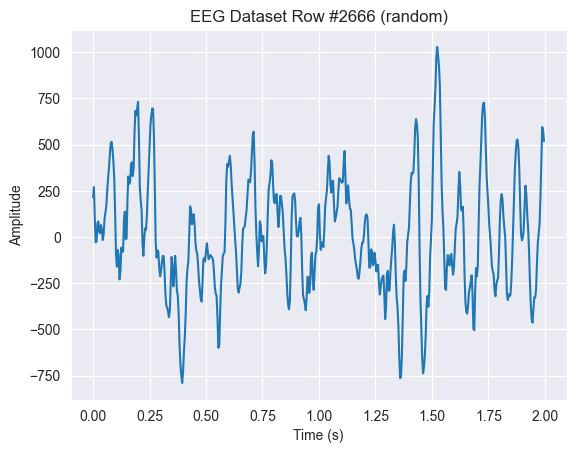

In [38]:
import matplotlib.pyplot as plt

eeg
num_rows, num_columns = eeg.shape

sampling_rate = 256  # Hz
duration = 2  # seconds
time = np.arange(0, duration, 1/sampling_rate)

#----PLOT FIRST ROW AS SAMPLE----
# plt.title('EEG Dataset - First Row')
# plt.plot(time, eeg[0])

#----PLOT RANDOM ROW AS SAMPLE-----
random_row_index = np.random.randint(num_rows) #produce random index or number
random_row = eeg[random_row_index] #extract row of that corresponding index
plt.plot(time, random_row)
plt.title(f'EEG Dataset Row #{random_row_index} (random)')


#----PLOT ALL-----
# for i in range(num_rows):
#     plt.plot(time, eeg[i])
# plt.title('EEG Dataset')

# Add labels and title to the plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

***The code in the paper's github repo is written in MatLab. The following are my attempts of trying to comprehend what goes on with their code line by line***

**Understanding the dataset structure**
EEG is a timeseries data that measures the electrical activity of the brain thus it detects and records the voltage.

* 512 data points were recorded per second
* Each data point represents the measurement of the EEG signal's voltage at a specific moment in time.
* The number of rows represents the number of instances or samples in the dataset, NOT the duration. Thus, there are 4514 samples of EEG data.
* The duration of each EEG data po

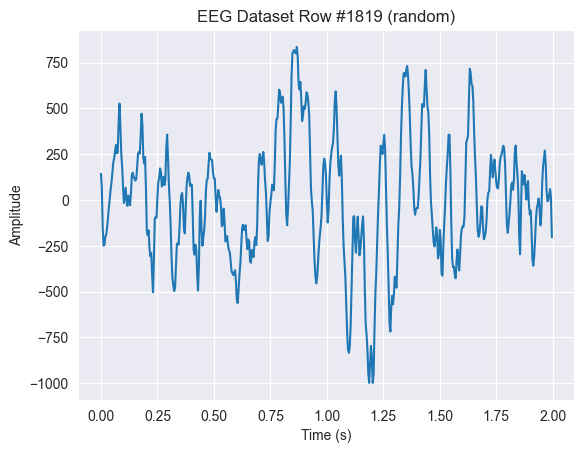

In [39]:
import matplotlib.pyplot as plt

eeg
num_rows, num_columns = eeg.shape

sampling_rate = 256  # Hz
duration = 2  # seconds
time = np.arange(0, duration, 1/sampling_rate)

#----PLOT FIRST ROW AS SAMPLE----
# plt.title('EEG Dataset - First Row')
# plt.plot(time, eeg[0])

#----PLOT RANDOM ROW AS SAMPLE-----
random_row_index = np.random.randint(num_rows) #produce random index or number
random_row = eeg[random_row_index] #extract row of that corresponding index
plt.plot(time, random_row)
plt.title(f'EEG Dataset Row #{random_row_index} (random)')


#----PLOT ALL-----
# for i in range(num_rows):
#     plt.plot(time, eeg[i])
# plt.title('EEG Dataset')

# Add labels and title to the plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

**Creating a function to visualize a randomized row of data for each eeg, emg, and eog datasets**

In [40]:
def plot_random_row(dataset, title:str):
    num_rows, num_columns = dataset.shape
    sampling_rate = 256  # Hz
    duration = 2  # seconds
    time = np.arange(0, duration, 1/sampling_rate)

    #----PLOT RANDOM ROW AS SAMPLE-----
    random_row_index = np.random.randint(num_rows) #produce random index or number
    random_row = dataset[random_row_index] #extract row of that corresponding index
    plt.plot(time, random_row)
    plt.title(f'{title} Dataset Row #{random_row_index} (random)')
    return plt.show()

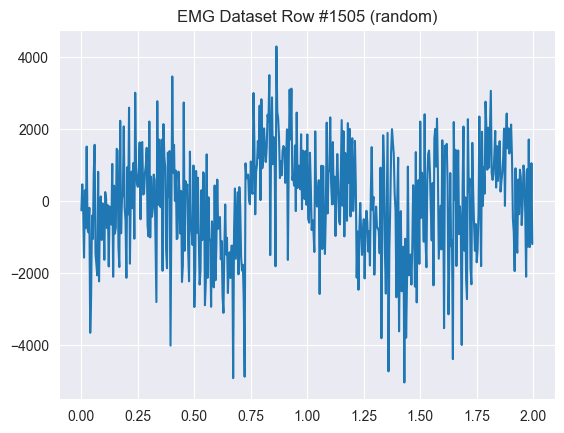

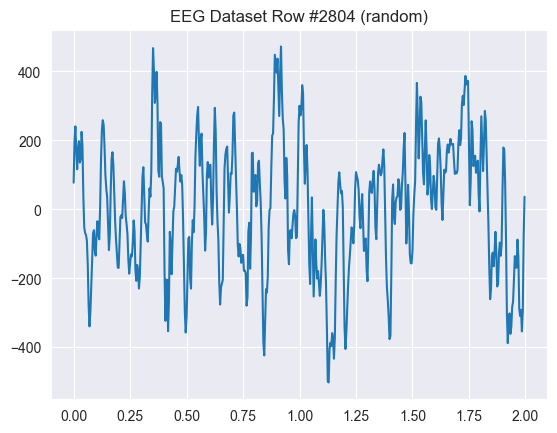

In [41]:
plot_random_row(emg,'EMG')
plot_random_row(eeg,'EEG')

## III. Related Literatures' Methods

| Authors + Year           | Title | Objective | Dataset | Methods |
|--------------------------|---------------------|-----------|---------|---------|
| Haoming Zhang et al 2021 | EEGdenoiseNet: a benchmark dataset for deep learning solutions of EEG denoising | Test dataset on different denoising methods (EMD, Filter, FCNN, Simple CNN, Complex CNN, RNN) | TBDTBDTBDTBDTBDTBDTBDTBDTBD | TBDTBDTBDTBDTBDTBDTBDTBDTBDTBD |